<center>
    <img src="resource/logo_uvsq.jpg" width="40%" />
    <br />
    <h1>Machine Learning avec Scikit-Learn</h1>
    <br /><br />
    <a href="mailto:almada.livia@gmail.com">Lívia Almada</a>
    <br /><br />
    Université de Versailles Saint-Quentain en Yveline
</center>

# Installation

Je suppose que python est déjà installé, sinon visitez: <a href="https://www.python.org/downloads/"> https://www.python.org/downloads/</a>

Pour installer les différents 'python packages', on utilise le pip dans le console comme ça: 
> pip install [package-name] 

Les packages qu'on va utiliser dans ce TP sont:
* numpy (calculs scientifiques rapides)
* scipy (calculs statistiques utiles)
* scikit-learn (module pour le machine learning)
* matplotlib (module pour la visualisation)
* jupyter (le notebook qu'on est en train d'utiliser)
* pandas (module pour lire les données des sources extérieures et les manipuler)



In [1]:
# Global settings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

In [2]:
# C'est un code python exécutable

# Vérifier si tout va bien

import numpy as np
import scipy
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd



Trois fonctions qui sont très utiles dans python sont _help()_, _dir()_ et _type()_
* _help(x)_: Afficher la documentation complète de _x_. Par exemple: _help(np)_ va afficher la documentation de Numpy, ce qu'il fait, comment l'utiliser...
* _dir(x)_: Afficher tous les attributs que nous pouvons appeler sur _x_. Par exemple si _x_ est une classe (Voiture) qui est les attributs modèle et année, donc ces deux attributs seront affichés lorsqu'on écrit _dir(x)_ 
* _type(x)_: Tout simplement affichera le type de _x_. Par exemple: str, int, list, dict...

In [3]:
# Exercise: Affichez la version de Numpy qu'on est en train d'utiliser

# Je vais utiliser dir() pour trouver comment afficher la version de Numpy
# Cet exercise est un exemple sur l'utilisation de dir() 
#   et c'est une introduction pour une des caractéristique importante de Python, qui s'appelle 
#      'List Comprehension'


l = [x for x in dir(np) if "version" in x]
print(l)
print(np.__version__)



['__mkl_version__', '__version__', 'version']
1.13.3


## Aperçu de scikit-learn

* Module de Machine learning qui est écrit en __Python__
* __Efficace et simple__ à utiliser
* Avec pas mal de <a href="http://scikit-learn.org/dev/documentation.html">documentations</a> et <a href="http://scikit-learn.org/dev/auto_examples/index.html">exemples</a>
* Il s'appuie sur __Numpy et Scipy__, et il ajoute des fonctions machine learning pour cet environment scientifique

## Algorithms:

__Apprentissage Supervisé (Supervised learning):__

* Modèles linéaires
* Régression
* Support Vector Machines
* Méthode basée sur l'arbre (Random Forests, Arbre de décision, ...)
* Nearest neighbors

__Apprentissage non Supervisé (Unsupervised learning):__

* Clustering (KMeans, Ward, ...)
* Density estimation
* Outlier detection

__Évaluation:__

* Cross-validation

# Apprentissage Supervisé (Supervised Learning)

Les données proviennent d'un ensemble d'apprentissage fini ${\cal L} = (X, y)$:
* Les inputs (échantillons) sont sous la forme d'un array $X$ de dimensions `n_samples` $\times$ `n_features`, et ils appartiennent à ${\cal X}$;
* Dans les problèmes de __classification__, les outputs (les classes cibles) sont sous la form d'un array $y$, et ils sont des valeurs _symboliques_ dans ${\cal Y}$.
* Dans les problèmes de __régression__, les outputs sont sous la form d'un array $y$, mais ils sont des valeurs _réelles_ dans ${\cal Y}$.

L'objectif principal de l'apprentissage supervisé est de construire un estimateur $f: {\cal X} \mapsto {\cal Y}$.

Et normalement on cherche pour un estimateur $f$ qui réduit l'erreur (loss function) autant que possible

In [4]:
# Cet exercise a pour but d'introduire les lists, numpy array et le module de visualisation dans python

# Géneration d'un dataset d'une manière aléatoire et le visualiser
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000, centers=10, random_state=123)

# X est un 2D numpy array avec 2000 lignes et 2 colonnes
print("Type X: %s" % type(X))
print("Dimensions de X:", X.shape)
print()


# y est un 1D numpy array avec 200 éléments
print("Type y: %s" % type(y))
print("Dimensions de y:", y.shape)
print()


# 'Slicing' est très util en Python
print("Les 5 premiers éléments de y:", y[:5])
print("Les 5 derniers éléments de y:", y[-5:])
print("Les éléments de y avec les indices 5, 7, 9, 11, et 13:", y[5:15:2])
print()

print("Les 5 premières lignes de X avec toutes les colonnes:")
print( X[:5,:])
print("Les 5 dernières lignes de X avec juste la deuxième colonne:", X[-5:,1])
print()


# On peut toujours transformer le numpy array en list et vice versa
y_list = y.tolist()
print("Type y_list: %s" % type(y_list))
y_array = np.array(y_list)
print("Type y_array: %s" % type(y_array))
print()


# Difference entre list et numpy array
# Calculs Mathematiques
a1 = a2 = np.arange(5)
print("a1: ", a1)
print("a1 + a2:", a1 + a2)
l1 = l2 = [i for i in range(5)]
print("l1 + l2:", l1 + l2)
l3 = [i1 + i2 for i1, i2 in zip(l1,l2)]
print("l3:", l3)
print()
# Fancy Indexing
a2 = np.array([0,1,1,0,0])
print("a1: ", a1)
print("a2: ", a2)
print("Fancy Indexing 1:", a1[a2 == 0])
print("Fancy Indexing 2:", a2[[0,4,2]])
# C'est pas possible avec le list
# Avec les lists les contenus peuvent être hététogènes et c'est pas possible avec numpy array
l = [1,"sklearn", 5.2]
print("Type de l[0] est %s, de l[1] est %s, et de l[2] est %s" % (type(l[0]), type(l[1]), type(l[2])))

# Pour les algorithms de scikit-learn, les inputs toujours doivent être soit un numpy array ou un scipy matrix

Type X: <class 'numpy.ndarray'>
Dimensions de X: (2000, 2)

Type y: <class 'numpy.ndarray'>
Dimensions de y: (2000,)

Les 5 premiers éléments de y: [5 2 0 9 9]
Les 5 derniers éléments de y: [4 8 9 7 5]
Les éléments de y avec les indices 5, 7, 9, 11, et 13: [0 8 7 6 7]

Les 5 premières lignes de X avec toutes les colonnes:
[[-2.71631341  5.4137805 ]
 [ 4.73431673 -1.19210087]
 [ 3.68418037 -4.63885323]
 [-0.06360833  0.5781254 ]
 [ 2.2452181   0.27818722]]
Les 5 dernières lignes de X avec juste la deuxième colonne: [-1.21282932 -6.82006305 -1.12476142  3.12611995  5.63538219]

Type y_list: <class 'list'>
Type y_array: <class 'numpy.ndarray'>

a1:  [0 1 2 3 4]
a1 + a2: [0 2 4 6 8]
l1 + l2: [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]
l3: [0, 2, 4, 6, 8]

a1:  [0 1 2 3 4]
a2:  [0 1 1 0 0]
Fancy Indexing 1: [0 3 4]
Fancy Indexing 2: [0 0 1]
Type de l[0] est <class 'int'>, de l[1] est <class 'str'>, et de l[2] est <class 'float'>


y est: [5 2 0 9 9 0 9 8 0 7]

y_labels est: ['rouge' 'bleu' 'bleu' 'rouge' 'rouge' 'bleu' 'rouge' 'rouge' 'bleu'
 'rouge']

y_labels est: ['rouge' 'bleu' 'bleu' 'rouge' 'rouge' 'bleu' 'rouge' 'rouge' 'bleu'
 'rouge']


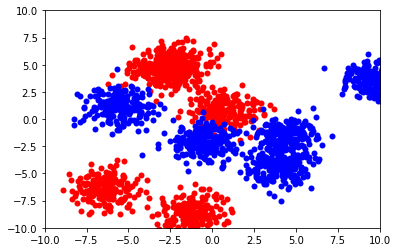

In [5]:
# changer l'array y et donner de labels au lieu des chiffres
print("y est:", y[:10])
print()

# Les chiffres moins que 5 seront bleu
# Les chiffres qui égales ou supérieur à 5 seront rouge 
y_labels = np.empty(y.shape, dtype='U10')
y_labels[y < 5] = "bleu"
y_labels[y >= 5] = "rouge"
print("y_labels est:", y_labels[:10])
print()

# Ou peut utiliser np.take pour faire le fancy indexing, et pour atteindre le même résultat
labels = ["rouge", "bleu"]
y_labels = np.take(labels, (y < 5))
print("y_labels est:", y_labels[:10])

# Visualiser les données qu'on a crée avec make_blobs en utilisant matplotlib.pyplot
for label in labels:
    mask = (y_labels == label)
    plt.scatter(X[mask,0], X[mask,1], c=label[0], linewidths=0)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

In [6]:
# Jouer un peu avec les datasets qui existent dans sckit-learn
# Trouver comment charger le iris data set
# Et trouver quels sont les atributs de ce data set


## Interface simple et unifié

Dans scikit-learn, lorsqu'on applique l'apprentissage supervisé on utilise toujours le même API, et peu importe la méthode ou le modèle qu'on emploie.

Les interfaces à utiliser sont simples et unifiées, Elles sont:
* _transformer_: si on voudrait faire de transformation sur les données avant de les utiliser pour l'apprentissage ou la prédiction. Toujours on utilise la même méthode __fit_transform()__
* _estimator_: on emploie la méthode __fit()__ de cette interface pour effectuer l'apprentissage
* _predictor_: on emploie la méthode __predict()__ de cette interface pour effectuer la prédiction

Tous les modèles d'apprentissage supervisé dans scikit-learn (arbres de décision, SVM, Bayes...) réalisent ces trois interfaces. Donc, n'importe quelle modèle on utilise, le code reste presque le même. 

<br/>
<center> 
        <img src="resource/supervised_scikit_learn.png" style="max-width: 80%; display: inline" /><br />
</center>

In [7]:
# Pour vous donner une idée

# Vérifier que les données sont dans le format demandé par scikit-learn
print("Vérification")
print(type(X))
print(X.shape)
print()

from sklearn.neighbors import KNeighborsClassifier
# On va utiliser le k-nearest neighbor classifier
clf = KNeighborsClassifier(n_neighbors=10)

clf.fit(X, y_labels)
# Et c'est tout! on a déjà appris un modèle de prediction (estimateur) qui est basé sur X et y
# La modèle qu'on a utilisé est le k-nearest neighbor

print("Les classes réelles des 5 premiers éléments de X:")
print(y_labels[:5])

# On a fait la prediction des premiers 5 éléments de X
print("Prédiction des classes des 5 premiers éléments de X:")
print(clf.predict(X[:5]))

# Même on peut avoir une prédiction avec les probabilités des classes
print("Prédiction des classes (avec probabilité [bleu, rouge]) des 5 premiers éléments de X:")
print(clf.predict_proba(X[:5]))

Vérification
<class 'numpy.ndarray'>
(2000, 2)

Les classes réelles des 5 premiers éléments de X:
['rouge' 'bleu' 'bleu' 'rouge' 'rouge']
Prédiction des classes des 5 premiers éléments de X:
['rouge' 'bleu' 'bleu' 'rouge' 'rouge']
Prédiction des classes (avec probabilité [bleu, rouge]) des 5 premiers éléments de X:
[[ 0.   1. ]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.   1. ]
 [ 0.1  0.9]]


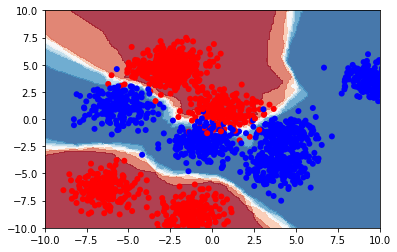

In [8]:
# Visualiser le résultat
import tutorial as tt
y_l = [y[0] for y in y_labels]
tt.plot_surface(clf, X, y_l)

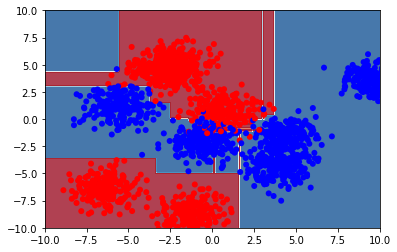

In [9]:
# Exercice: Utiliser une arbre de décision au lieu de kNearestNeighbor
#   et reexécuter l'apprentissage sur X et y
#   puis faire de prédiction avec l'arbre pour quelque éléments de X

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X,y_labels)
clf.predict(X[:5])
tt.plot_surface(clf,X,y_l)


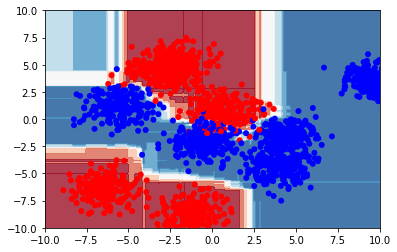

In [10]:
# Exercice: Faire la même chose mais avec le Random Forests Classifier

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X,y_labels)
clf.predict(X[:5])
tt.plot_surface(clf,X,y_l)


On a brièvement vu comment faire l'apprentissage supervisé avec scikit-learn en utilisant la méthode _fit()_ de l'interface _estimator_, et comment faire la prédiction en utilisant la méthode _predict()_ de l'interface _predictor_.

Mais normalement, efféctuer l'apprentissage et la prédiction sont les dernières étapes qu'on fait dans le processus complet de machine learning. Ce processus se compose des différentes étapes, et il peut devenir assez compliqué.

Dans le plupart de cas, il faut nettoyer (preprocessing) les données avant les utiliser. Et scikit-learn facilite cette étape en utilisant l'interface _transformer_.

Dans cette interface, il existe 3 méthodes:
* fit(): qui vérifie automatiquement le données, trouve les rélations entre eux, et apprend comment les transformer
* transform(): c'est la méthode qui fait la transformation après la méthode _fit()_
* fit_transform(): c'est un raccourci pour exécuter les deux méthodes _fit() et transform()_

In [11]:
# Un example
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

digits = load_digits()
X, y = digits.data, digits.target

tf = StandardScaler()
X_t = tf.fit_transform(X)

print("Moyen avant la transformation: ", np.mean(X))
print("Moyen après la transformation: ", np.mean(X_t))
print()

Moyen avant la transformation:  4.88416457986
Moyen après la transformation:  8.6494837756e-19

